In [1]:
from system import *

Load IGRF coefficients ...


In [3]:
b_field = t89(7)

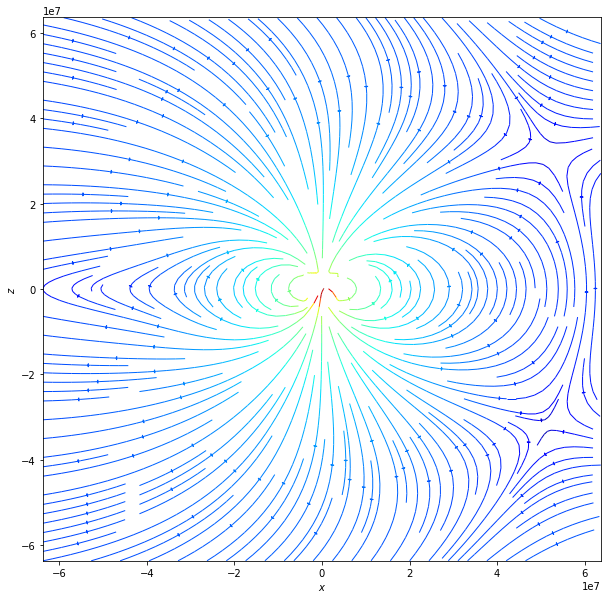

In [52]:
plot_field(b_field, 'y', 50, [-10 * Re, 10 * Re], [-10 * Re, 10 * Re])

In [39]:
import PyGeopack as gp

def plot_field_new(axis, nodes, x_lims, y_lims, size = (10, 10), t = 0.0):
    x = np.linspace(x_lims[0], x_lims[1], nodes)
    y = np.linspace(y_lims[0], y_lims[1], nodes)

    U, V = np.meshgrid(x, y)
    X, Y = np.meshgrid(x, y)

    fig, ax = plt.subplots(figsize=size)

    if axis_num[axis] == 0:
        for i in range(nodes):
            for j in range(nodes):
                #W, U[i][j], V[i][j] = field(np.array([1e-20, X[i][j], Y[i][j]]), t)
                W, U[i][j], V[i][j] = gp.ModelField(1e-20, X[i][j], Y[i][j], 20150101, 1, Model='T89', CoordIn='GSM', CoordOut='GSM', Kp=7, tilt=0)
                ax.set_xlabel('$y$')
                ax.set_ylabel('$z$')
    elif axis_num[axis] == 1:
        for i in range(nodes):
            for j in range(nodes):
                #U[i][j], W, V[i][j] = field(np.array([X[i][j], 1e-20, Y[i][j]]), t)
                U[i][j], W, V[i][j] = gp.ModelField(X[i][j], 1e-20, Y[i][j], 20150101, 1, Model='T89', CoordIn='GSM', CoordOut='GSM', Kp=7, tilt=0)
                ax.set_xlabel('$x$')
                ax.set_ylabel('$z$')
    elif axis_num[axis] == 2:
        for i in range(nodes):
            for j in range(nodes):
                #U[i][j], V[i][j], W  = field(np.array([X[i][j], Y[i][j], 1e-20]), t)
                U[i][j], V[i][j], W = gp.ModelField(X[i][j], Y[i][j], 1e-20, 20150101, 1, Model='T89', CoordIn='GSM', CoordOut='GSM', Kp=7, tilt=0)
                ax.set_xlabel('$x$')
                ax.set_ylabel('$y$')

    color = 2 * np.log(np.hypot(U, V))
    ax.streamplot(X, Y, U, V, color=color, linewidth=1, cmap=plt.cm.jet, density=2, arrowstyle='wedge', arrowsize=1.)

    ax.set_xlim(x_lims[0], x_lims[1])
    ax.set_ylim(y_lims[0], y_lims[1])
    plt.show()

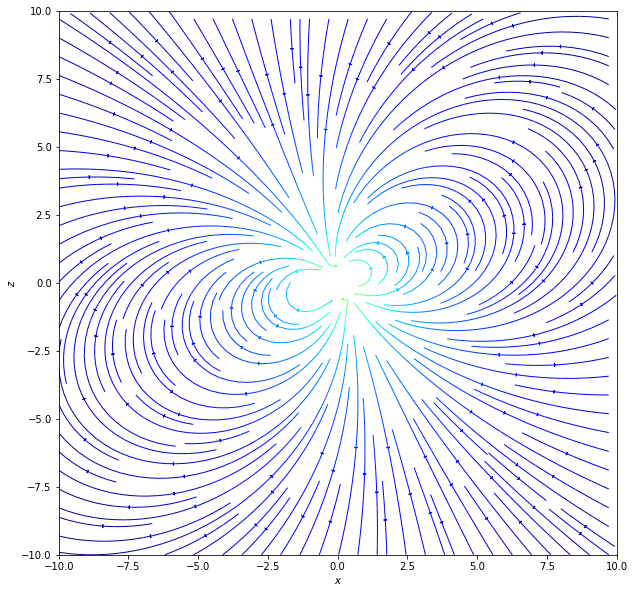

In [50]:
plot_field_new('y', 50, [-10, 10], [-10, 10])

In [61]:
import geopack.geopack as gpo

Load IGRF coefficients ...


In [129]:
import datetime
from dateutil import parser

# From date and time
t0 = parser.parse('1970-01-01/00:00:00')
t1 = parser.parse('2001-01-01/00:00:00')
ut = (t1-t0).total_seconds()

ps = gpo.recalc(0, -400, 0, 0)

np.array(gpo.t89.t89(7, ps, -10, 0, 0))

array([48.40465276,  0.        , -2.66061496])

In [130]:
t89(7, ut)(np.array([-10 * Re, 0, 0])) * 1e9

array([48.89491651, -0.31332598, 27.70485934])

In [ ]:
gp.ModelField(-10, 0, 0, 19700101, 0, Model='T89', CoordIn='GSM', CoordOut='GSM', Kp=7, vx=-400, vy=0, vz=0)